Импорты

In [1]:
from sympy import Symbol, solve, lambdify, Matrix
import numpy as np
import matplotlib.pyplot as plt

### Описание модели 5

Система уравнений:

$$ \begin{cases}
\frac{dx}{dt} = k_{1}z - k_{-1}x - k_{3}xz + k_{-3}y - k_{2}z^{2}x\\
\frac{dy}{dt} = k_{3}xz - k_{-3}y\\
0<=x<=1, 0<=y<=1, 0<=x + 2y<=1\\
\end{cases} $$
    

$k_{1} = 0.12, 
k_{-1} = 0.01, 
k_{2} = 0.95, 
k_{3} = 0.0032, 
k_{-3} = 0.002$

In [28]:
k1_val, k2_val, k3_val = 0.012, 0.95, 0.0032
km1_val, km3_val = 0.01, 0.002

In [3]:
# Params
k1, k2, k3 = Symbol("k1"), Symbol("k2"), Symbol("k3")
km1, km3 = Symbol("km1"), Symbol("km3")
# Searched functions
x, y = Symbol("x"), Symbol("y")
# Non-linear component
z = 1 - x - 2*y

Решение уравнения относительно $x$ и $k_{1}$

In [4]:
eq1 = k1*z - km1*x - k3*x*z + km3*y - k2*(z**2)*x
eq2 = k3*x*z - km3*y
res = solve([eq1, eq2], y, k1)
ySolution = res[0][0]
k1Solution = res[0][1]


In [5]:
ySolution

-k3*x*(x - 1)/(2*k3*x + km3)

In [6]:
k1Solution

-x*(k2*km3**2*x**2 - 2*k2*km3**2*x + k2*km3**2 + 4*k3**2*km1*x**2 + 4*k3*km1*km3*x + km1*km3**2)/(km3*(x - 1)*(2*k3*x + km3))

Матрица системы, её Якобиан, след, определитель (символьные переменные)

In [7]:
A = Matrix([eq1, eq2])
var_vector = Matrix([x, y])
jacA = A.jacobian(var_vector)
traceA = jacA.trace()
detA = jacA.det()

### Однопараметрический анализ

In [8]:
X = np.arange(1e-2, 1, 1e-2)

Анализ знака определителя

[15 87]


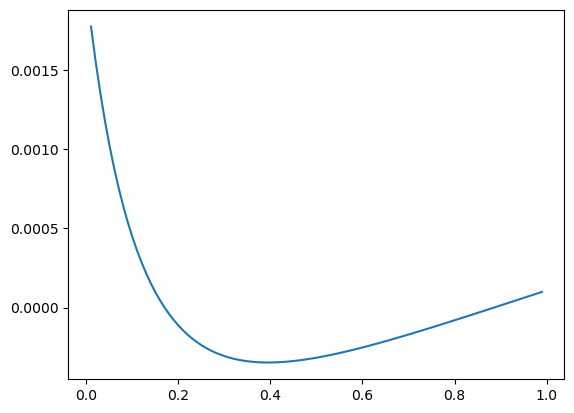

In [29]:
# Function to calculate det(A)
detA_from_x = lambdify((x, k1, k2, k3, km1, km3), detA.subs(y, ySolution))

# det(A) values
detA_values = detA_from_x(X, k1_val, k2_val, k3_val, km1_val, km3_val)

# Find all zero points
detA_zeros = []
for i in range(detA_values.shape[0] - 1):
    if detA_values[i] == 0 or detA_values[i] * detA_values[i + 1] < 0:
        detA_zeros.append(i)
detA_zeros = np.array(detA_zeros)
print(detA_zeros)

# Plot
plt.plot(X, detA_values)
plt.show()

[23 92]


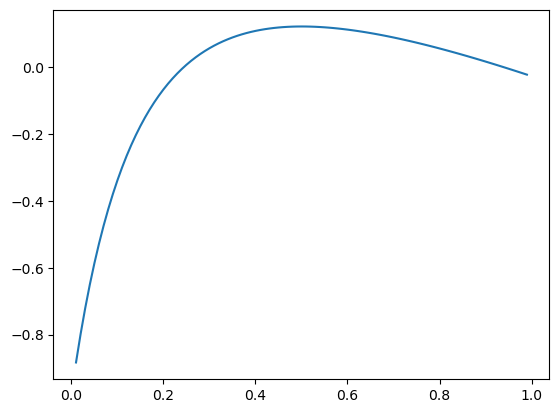

In [39]:
# Function to calculate trace(A)
traceA_from_x = lambdify((x, k1, k2, k3, km1, km3), traceA.subs(y, ySolution))

# trace(A) values
traceA_values = traceA_from_x(X, k1_val, k2_val, k3_val, km1_val, km3_val)

# Find all zero points
traceA_zeros = []
for i in range(traceA_values.shape[0] - 1):
    if traceA_values[i] == 0 or traceA_values[i] * traceA_values[i + 1] < 0:
        traceA_zeros.append(i)
traceA_zeros = np.array(traceA_zeros)
print(traceA_zeros)

# Plot
plt.plot(X, traceA_values)
plt.show()

Графики

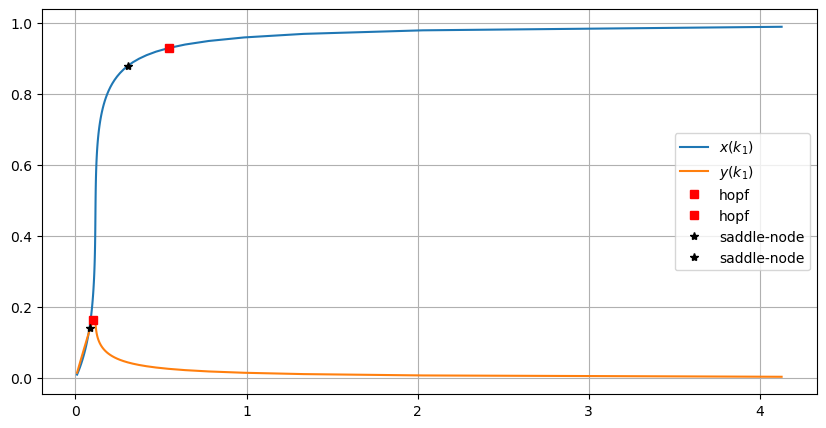

In [55]:
# Figure
figure = plt.figure(figsize=(10, 5))

# Subplot
subplot = figure.add_subplot()

# Functions to get y and k1 values
y_from_x = lambdify((x, k2, k3, km1, km3), ySolution)
k1_from_x = lambdify((x, k2, k3, km1, km3), k1Solution)
# Values
K1 = k1_from_x(X, k2_val, k3_val, km1_val, km3_val)
Y = y_from_x(X, k2_val, k3_val, km1_val, km3_val)

# Plotting x,y
subplot.plot(K1, X, label=r'$x(k_{1})$')
subplot.plot(K1, Y, label=r'$y(k_{1})$')

# Plotting hopf
subplot.plot(K1[traceA_zeros[1]], X[traceA_zeros[1]], 'rs', label='hopf')
subplot.plot(K1[traceA_zeros[0]], Y[traceA_zeros[0]], 'rs', label='hopf')

# Plotting saddle-node
subplot.plot(K1[detA_zeros[1]], X[detA_zeros[1]], 'k*', label='saddle-node')
subplot.plot(K1[detA_zeros[0]], Y[detA_zeros[0]], 'k*', label='saddle-node')

# Beauty
subplot.legend()
subplot.grid()